In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# Loading of data
games = pd.read_csv("games.csv")

In [5]:
# Print the name of columns
print(games.columns)

print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


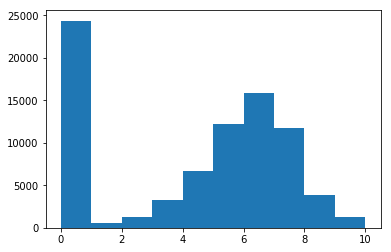

In [6]:
# Make the histrogram of all the ratings of average_rating column
plt.hist(games["average_rating"])
plt.show()

In [7]:
# Print the first rows of all the column with average_rating 0
print(games[games["average_rating"] == 0].iloc[0])

# Print the first rows of all the column with average_rating greater then 0
print(games[games["average_rating"] > 0].iloc[0])


id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

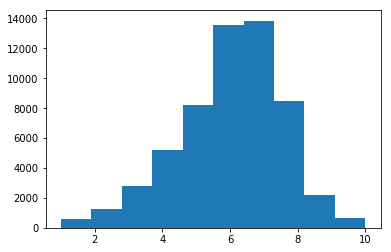

In [8]:
# Remove any rows without user review
games = games[games["users_rated"] > 0]

# Remove any row with missing values
games = games.dropna(axis=0)

# Making histrogram after removal
plt.hist(games["average_rating"])
plt.show()

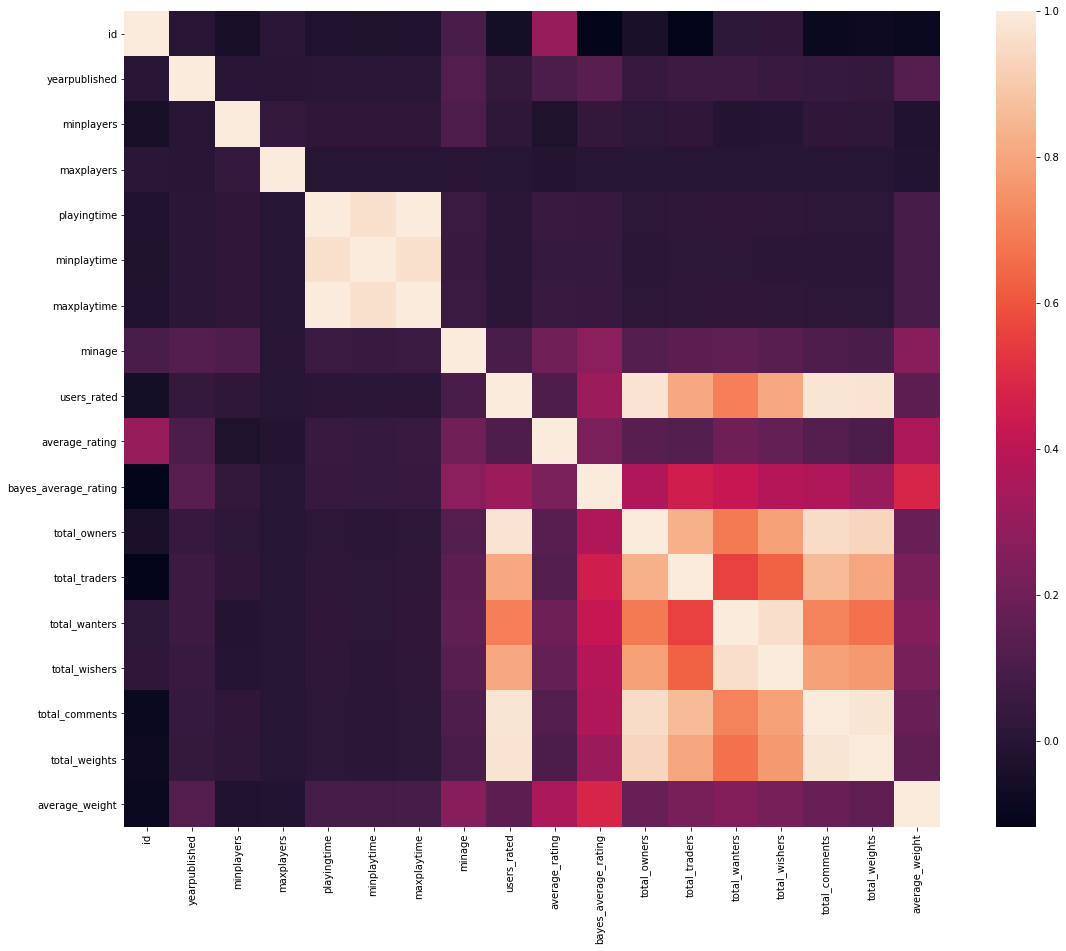

In [17]:
# Correlation matrix 
cormat =  games.corr()
fig = plt.figure(figsize = (20,15))

sns.heatmap(cormat, vmax = 1.0, square = True)
plt.show()

In [22]:
# Collect all the columns from the dataframe
columns = games.columns.tolist()

# Filter the columns and remove the data
columns = [c for c in columns if c not in["bayes_average_rating","average_rating","type","name","id"]]

# Store the variable we will be predicting on
target = "average_rating"

In [23]:
# Generating the training and test set
from sklearn.model_selection import train_test_split

# Generating the training set
train = games.sample(frac = 0.8, random_state = 1)

# Generating the test set
test = games.loc[~games.index.isin(train.index)]

# Print the shape
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [25]:
# Import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initilize the model class
LR = LinearRegression()

# Fit the model in training data
LR.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
 # Generate the prediction for the test set
prediction = LR.predict(test[columns])

# Compute errors between train and test
mean_squared_error(prediction, test[target])

2.078819032629326

In [28]:
# Import the random forest model
from sklearn.ensemble import RandomForestRegressor

# Model initilize
RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 1 )

# Fit the data
RFR.fit(train[columns], train[target])



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [29]:
# Prediction on test model
prediction = RFR.predict(test[columns])

# Mean square error
mean_squared_error(prediction, test[target])

1.4458560046071653

In [33]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [31]:
# Make prediction with both models
rating_LR = LR.predict(test[columns].iloc[0].values.reshape(1, -1))
rating_RFR = RFR.predict(test[columns].iloc[0].values.reshape(1, -1))

# Printing the result
print(rating_LR)
print(rating_RFR)

[8.12061283]
[7.91373581]


In [34]:
test[target].iloc[0]

8.07933